Echantillonage 2D
========
TP1 séance 2-3
========
--------
Combal Quentin

Cocogne Romain

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline 

 1) Programmez la decimation:
 
   Faire une fonction pour la decimation.
   
   Appliquer la fonction de decimation et montrer les images avant et apres decimation.

décimation: on sous-échantillonne l'image.

In [2]:
#input: img tableau d'entiers correspondant a une image, dec facteur de decimation
#output: tableau d'entiers correspondant à l'image d'origine sous-echantillonnee 
def decimation (img, dec):
    return img[1:img.shape[0]:dec,1:img.shape[1]:dec]

On test la fonction avec plusieur images. on observe bien le résultat attendu. C'est à dire une baisse de résolution des images et des pertes d'information.

In [3]:
#input: img_name nom du fichier image
#ouput: sur sortie standard, images avec different degres de decimation
def test_decim(img_name):
    img = cv2.imread(img_name)
    plt.figure(1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('image originale'), plt.xticks([]), plt.yticks([])
    for i in range(2,5):
        plt.figure(i)
        plt.imshow(cv2.cvtColor(decimation(img,pow(2,i)), cv2.COLOR_BGR2RGB))
        plt.title('decimation de facteur '+str(pow(2,i))), plt.xticks([]), plt.yticks([])
    plt.show()

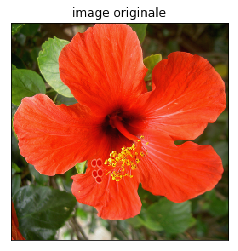

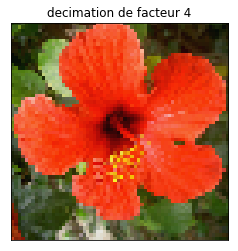

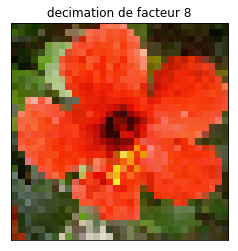

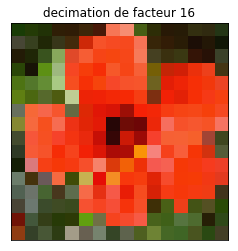

In [4]:
test_decim('AAA.png')

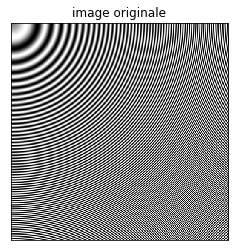

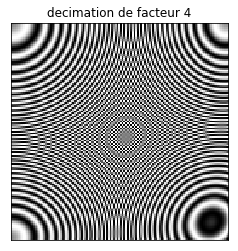

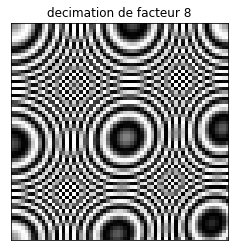

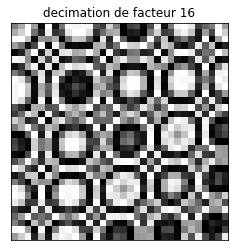

In [5]:
test_decim('imageCercles.png')

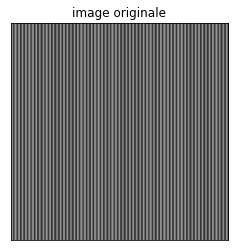

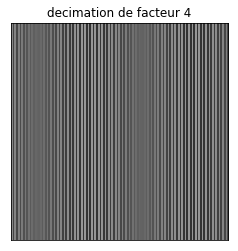

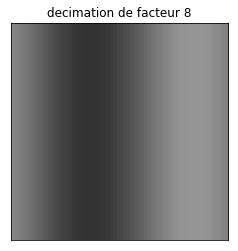

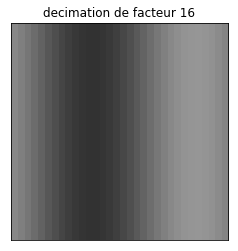

In [6]:
test_decim('imageSinus.png')

2) Examinez le contenu de l’image du sinus avant et après décimation dans le domaine spectral. Indiquez
le phénomène en termes mathématiques.

In [92]:
#input: le facteur de decimation
#output: sur la sortie standard, le decimee et son spectre frequentiel
def spectre (img,dec,dim=1):
    #img = cv2.imread(img,0)
    img=decimation(img,dec)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift+1e-8))
    if(dim==1):
        plt.figure(1),plt.imshow(img, cmap = 'gray')
        plt.title('image de base'), plt.xticks([]), plt.yticks([])
        plt.figure(2),plt.plot(magnitude_spectrum[int(magnitude_spectrum.shape[1]/2)])
        plt.title('spectre')
        plt.show()
    elif(dim==2):
        plt.figure(1),plt.imshow(img, cmap = 'gray')
        plt.title('image de base'), plt.xticks([]), plt.yticks([])
        plt.figure(2),plt.imshow(magnitude_spectrum,cmap='gray')
        plt.title('spectre')
        plt.show()

On observe bien le spectre du sinus. On voit la composante continue en 0 et les deux dirac en environ +/- 100Hz.

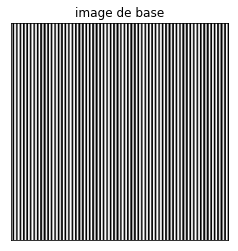

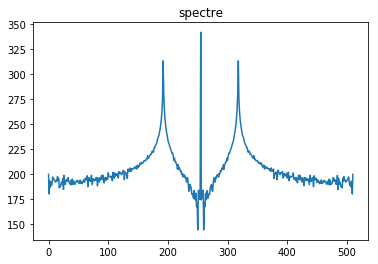

In [93]:
img_sin=img = cv2.imread('imageSinus.png',0)
spectre(img_sin,1)

On remarque qu'ici les fréquences des dirac sont différentes (environ +/-60Hz). De plus les amplitudes des dirac sont modifiées. On observe donc le phénomène de repliement.

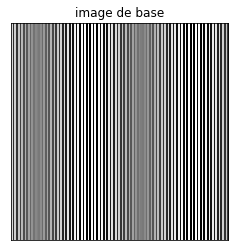

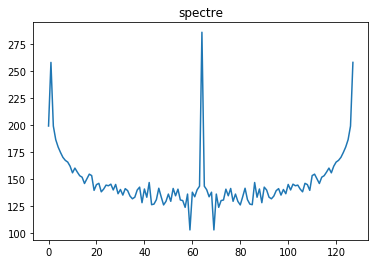

In [94]:
spectre(img_sin,4)

Ici les dirac caractéristiques du sinus ont disparu, on ne voit que la composante continue. Il semble donc que tous les dirac sont confondus. Le phénomène de repliement est bien mis en évidence

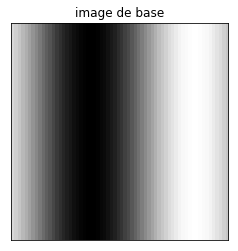

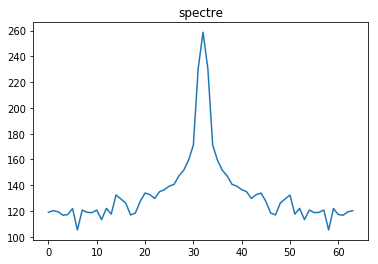

In [95]:
spectre(img_sin,8)

On observe de nouveau les 3 dirac distinctement. Cela confirme qu'ils étaient confondus sur le spectre précédent.

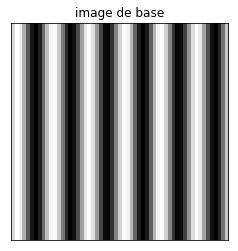

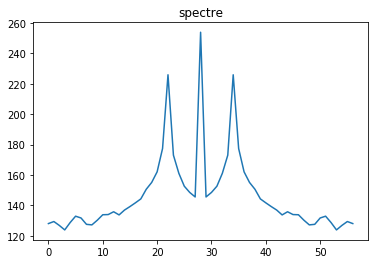

In [96]:
spectre(img_sin,9)

3). Proposez un filtre naïf dans le domaine spectral pour éviter le phénomène observé.

In [158]:
def filtre_pb(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    H=np.zeros(fshift.shape)
    r=150
    for i in range(H.shape[0]):
        for j in range(H.shape[1]):
            if((H.shape[0]/2-i)*(H.shape[0]/2-i)+(H.shape[1]/2-j)*(H.shape[1]/2-j)<=r*r):
                H[i,j]=1
    fshift*=H
    #img=np.abs(np.fft.ifft2(fshift))
    magnitude_spectrum = 20*np.log(np.abs(fshift+1e-8))
    plt.figure(1),plt.imshow(img, cmap = 'gray')
    plt.title('image de base'), plt.xticks([]), plt.yticks([])
    plt.figure(2),plt.imshow(magnitude_spectrum,cmap='gray')
    plt.title('spectre')
    plt.show()
    return img


def filtre_pb_spectre (img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    H=np.zeros(fshift.shape)
    a=int(H.shape[0]/2-150); b=int(H.shape[0]/2+151)
    H[a:b,a:b]=1
    fshift*=H
    return fshift
def aff_spectre(sp):
    magnitude_spectrum = 20*np.log(np.abs(sp+1e-8))
    img=np.abs(np.fft.ifft2(sp))
    plt.figure(1),plt.imshow(img, cmap = 'gray')
    plt.title('image de base'), plt.xticks([]), plt.yticks([])
    plt.figure(2),plt.imshow(magnitude_spectrum,cmap='gray')
    plt.title('spectre')
    plt.show()

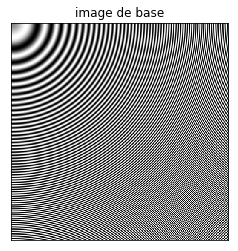

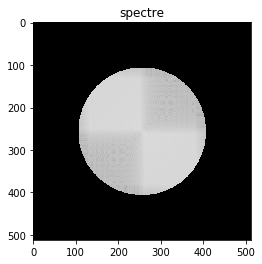

array([[128, 128, 128, ..., 144, 254, 106],
       [128, 128, 128, ..., 144, 254, 106],
       [128, 128, 129, ..., 145, 254, 105],
       ...,
       [144, 144, 145, ...,   1, 131, 253],
       [254, 254, 254, ..., 131, 253,  79],
       [106, 106, 105, ..., 253,  79,  20]], dtype=uint8)

In [159]:
img_cercle=cv2.imread('imageCercles.png',0)
filtre_pb(img_cercle)

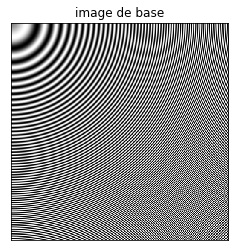

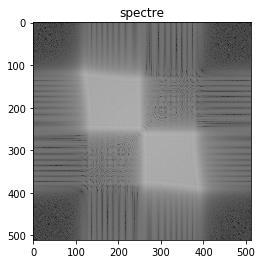

In [146]:
spectre(img_cercle,1,2)

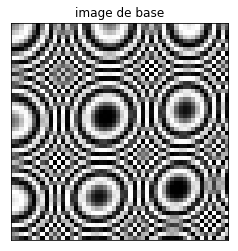

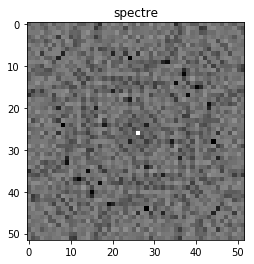

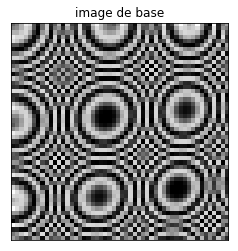

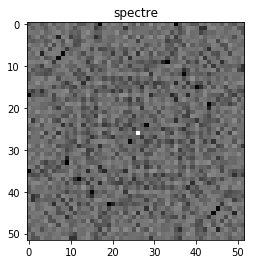

In [147]:
spectre(img_cercle,10,2)
spectre(filtre_pb(img_cercle),10,2)

4)Commentez la méthode proposée. Les résultats obtenus présentent-ils des dégradations visibles ? Proposer une explication pour le nouveau phénomène observé.


In [ ]:
https://images.math.cnrs.fr/Le-phenomene-de-Gibbs.html

5)Proposez un ou plusieurs filtres qui permettent d’effectuer une décimation avec des défauts
presque négligeables.
